In [25]:
""""
This part build a keyword network using the keyword relevancy score as weighted links.
Degree and weights could be used as feature for other modeling work.
The network is too large, so it would be super slow to run other centrality and community detection algorithms

""""
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

import pandas as pd
import sys
import os
import time
from datetime import datetime
from datetime import timedelta  

from glob import glob
import os
from os import listdir
from os.path import isfile, join
import json

import urllib
# sys.path.insert(0,r'Desktop\vl_code\DataScience')
sys.path.insert(0,'/user/zhaoyu/tree')

import numpy as np
from multiprocessing import Pool, current_process
from importlib import reload
import PWLib as PWLib
reload(PWLib)
from PWLib.VTracker import VTracker

vt_key='Input V tracker API key here'
# vt_key = 'SalesEstimate'

reload(PWLib)
from PWLib import AzureBlob
from PWLib import VL_Blobs
from PWLib.VL_Blobs import ASIN
from PWLib.Util import Util
from PWLib.Campaign import Campaign
from PWLib.KeywordResearchInquiry import KeywordResearchInquiry
from PWLib import KeywordMeasurements


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import itertools
import seaborn as sns
import ast

account_name= "vlst"
account_key= "Input VL blob API key here"

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

blob = ASIN(account_name,account_key)
marketplace = 'US'

import calendar
import re

import networkx as nx
from collections import Counter

In [26]:
keyw_inq = KeywordResearchInquiry(marketplace='US',account_name=account_name,account_key=account_key)

In [22]:
search_df = pd.read_csv('Amazon Search Terms_US (05_26-06_01,2019).csv', header=1)
# use this search term as the root source to start building the network

In [23]:
search_df.head(2)

,Department,Search Term,Search Frequency Rank,#1 Clicked ASIN,#1 Product Title,#1 Click Share,#1 Conversion Share,#2 Clicked ASIN,#2 Product Title,#2 Click Share,#2 Conversion Share,#3 Clicked ASIN,#3 Product Title,#3 Click Share,#3 Conversion Share
0,Amazon.com,wireless earbuds,1,B07NY79DYX,"Bluetooth Headphones,Wireless Earbuds,Bluetoot...",3.67%,0.06%,B07MXD73Z4,Bluetooth Headphones Wireless Earbuds Earphone...,3.07%,2.68%,B07FPG94RP,Bluetooth Earbuds Wireless Headphones Bluetoot...,2.65%,15.38%
1,Amazon.com,bluetooth headphones,2,B07RPF5H8K,Wireless Bluetooth Headphones-Wireless in-Ear ...,4.86%,0.00%,B07QCCXCDR,"Bluetooth Earbuds,Bluetooth Headphones,Wireles...",3.68%,0.03%,B07MXD73Z4,Bluetooth Headphones Wireless Earbuds Earphone...,3.25%,1.07%


In [24]:
search_df.shape

(790333, 15)

In [54]:
############ Build a large dictionary, key: (keyword1, keyword2), value: the relevancy score for the two keywords

score_dict = {}
sample_num = len(search_df)
s_df = search_df[:sample_num]
keyw_ls = list(s_df['Search Term'])

w_counter = 0

while w_counter < len(keyw_ls):
    w = keyw_ls[w_counter]
    if w_counter % 5000 == 0:
        print(w_counter)
    w_counter += 1
    try:
        res = keyw_inq.GetData(w)
        if res:
            s_ls = res['MainKeywords']
            for dc in s_ls:
                w2 = dc['Phrase']
                if w < w2:
                    wk = (w, w2)
                else:
                    wk = (w2, w)
                if wk not in score_dict.keys():
                    score_dict[wk] = dc['Score']   
    except:
        print('GetDKeywordResearchInquiryata Error quote_from_bytes() expected bytes')

GetDKeywordResearchInquiryata Error quote_from_bytes() expected bytes
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
730000
735000
740000
745000
750000
755000
760000
765000
770000
775000
780000
785000
790000


In [55]:
len(score_dict)

119347524

In [58]:
##################### Build the network
G_weighted = nx.Graph()
loop_counter = 0
for key, value in score_dict.items():
    G_weighted.add_edge(key[0],key[1], weight=value)
    loop_counter += 1
    if loop_counter % 1000000 == 0:
        print(loop_counter)

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
49000000
50000000
51000000
52000000
53000000
54000000
55000000
56000000
57000000
58000000
59000000
60000000
61000000
62000000
63000000
64000000
65000000
66000000
67000000
68000000
69000000
70000000
71000000
72000000
73000000
74000000
75000000
76000000
77000000
78000000
79000000
80000000
81000000
82000000
83000000
84000000
85000000
86000000
87000000
88000000
89000000
90000000
91000000
92000000
93000000
94000000
95000000
96000000
97000000
98000000
99000000
100000000
101000000
102000000
103000000
104000000
105000000
106000000
107000000
108000000
109000000
110000000
11100000

In [59]:
print(nx.info(G_weighted))

Name: 
Type: Graph
Number of nodes: 24495904
Number of edges: 119347524
Average degree:   9.7443


In [60]:
degree_sequence = sorted([d for n, d in G_weighted.degree()], reverse=True)

Text(0.5, 0, 'rank')

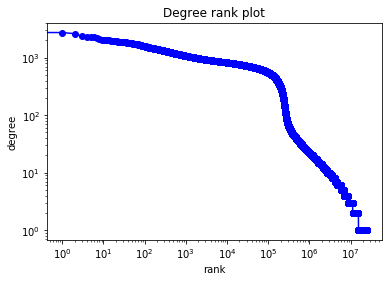

In [61]:
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

In [64]:
degree_df =  pd.DataFrame(G_weighted.degree())

In [142]:
degree_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24495904 entries, 24764 to 24495903
Data columns (total 2 columns):
keyword    object
degree     int64
dtypes: int64(1), object(1)
memory usage: 560.7+ MB


In [66]:
degree_df.columns = ['keyword', 'degree']

In [67]:
degree_df =  degree_df.sort_values(['degree'], ascending=[False])

In [69]:
degree_df.head(20)

,keyword,degree
24764,iphone,2756
351304,iphome,2746
5115203,iphon,2624
642,apple,2360
20306264,ip,2324
3853182,wi,2308
1286890,a,2268
2755778,i,2239
282,wireless,2084
11454,aplle watch,2072


In [71]:
########## this dataframe stores the sum of all relevancy score (weight in the network) for the keywords
w_sum_df =  pd.DataFrame(G_weighted.degree(weight='weight'))
w_sum_df.columns = ['keyword', 'total_weight']
w_sum_df =  w_sum_df.sort_values(['total_weight'], ascending=[False])

In [72]:
w_sum_df.head(20)

,keyword,total_weight
3028764,hp ink cartridge 950 951,133800.08
6614697,hp ink 63,131587.67
5621248,hp officejet pro 8600 ink,128278.89
298492,hp printer ink 63,127963.43
2149868,hp 902xl,127340.67
2730755,printer ink hp 63,126561.92
5731154,ink cartridges hp 62,126428.46
2149558,hp ink cartridge 62,126399.41
152832,elta sunscreen,125815.45
2019762,hp 410a printer cartridges,125312.08


In [76]:
## save the score dictionary
score_dict_list = {}
k1s = []
k2s = []
vs = []
for key, value in score_dict.items():
    k1s.append(key[0])
    k2s.append(key[1])
    vs.append(value)
score_dict_list['keyword1'] = k1s
score_dict_list['keyword2'] = k2s
score_dict_list['weight'] = vs

In [77]:
# def merge_dicts_to_df(list_of_dicts):
#     v_list = list_of_dicts
#     data = v_list[0]
#     df_asin = pd.DataFrame([data], columns=data.keys())
#     if len(v_list) > 1:
#         for i in range(1, len(v_list)):
#             data = v_list[i]
#             df_t = pd.DataFrame([data], columns=data.keys())
#             df_asin = pd.concat([df_asin, df_t], axis=0, ignore_index=True, sort=False)
#     return df_asin
score_dict_df = pd.DataFrame.from_dict(score_dict_list)
score_dict_df.to_csv('keyword_relevance.csv', index=False)

In [82]:
score_dict_df.shape

(119347524, 3)

In [ ]:
#### calculate the betweenness centrality. Super long running.
betCent = nx.betweenness_centrality(G_weighted, normalized=True, endpoints=True)

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2169
Average degree:   4.3380


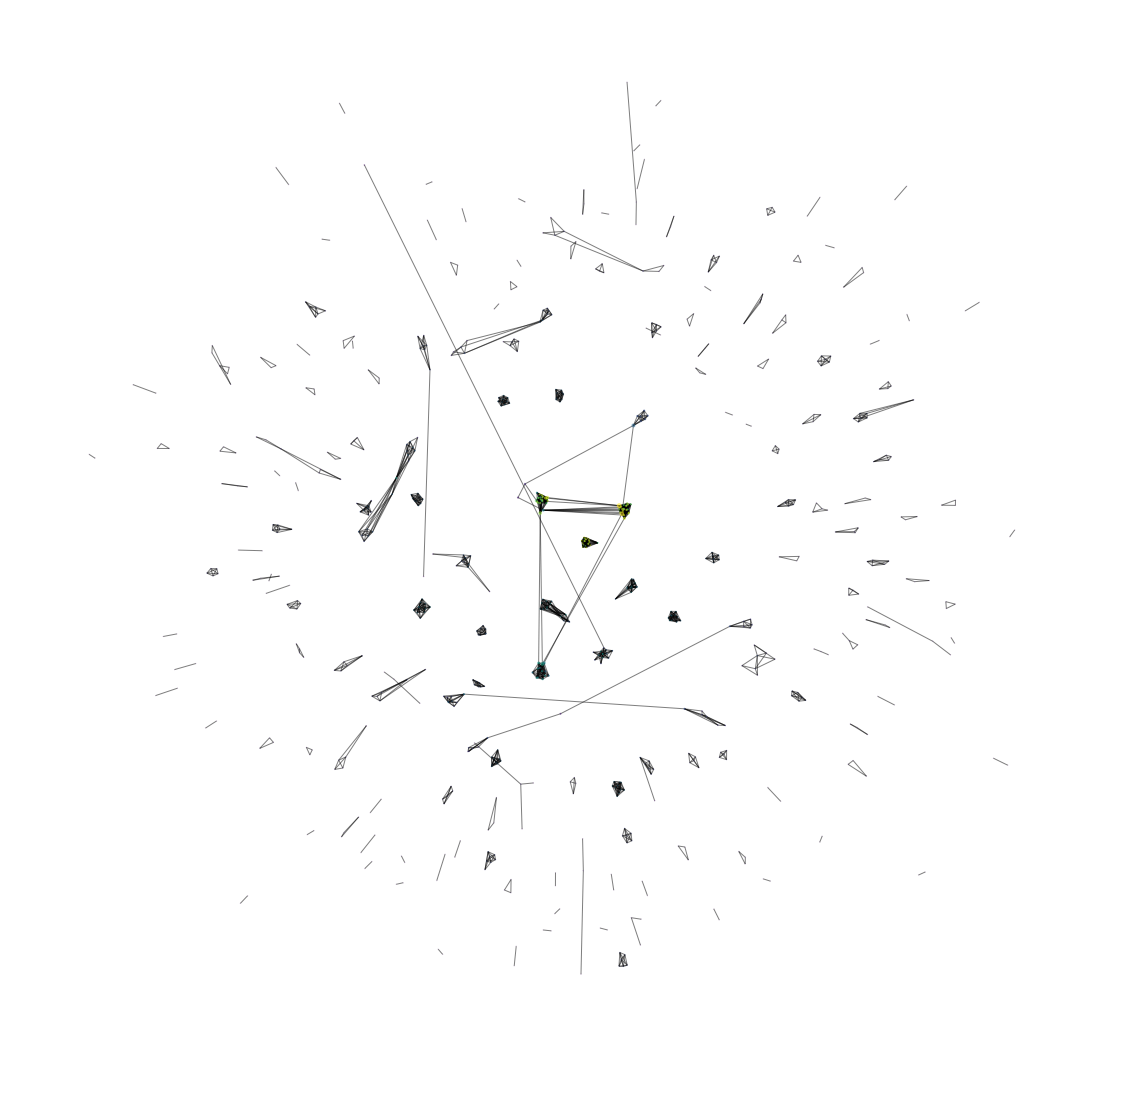

In [134]:
######### PLot the network for top 1000 keywords regarding sum of weights
# sub_list = list(degree_df['keyword'][:500])
sub_list = list(w_sum_df['keyword'][:1000])
G_sub = G_weighted.subgraph(sub_list)
print(nx.info(G_sub))

pos = nx.spring_layout(G_sub,k=0.15,iterations=20)
# pos = nx.spring_layout(G_sub)
betCent = nx.betweenness_centrality(G_sub, normalized=True, endpoints=True)
node_color = [20000.0 * G_sub.degree(v) for v in G_sub]
node_size =  [v * 10000 for v in betCent.values()]
font_size  = [v*10000  for v in betCent.values()]
font_size = [v+0.001 if v==0 else v for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.5)
plt.axis('off')
plt.show()

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2209
Average degree:   4.4180


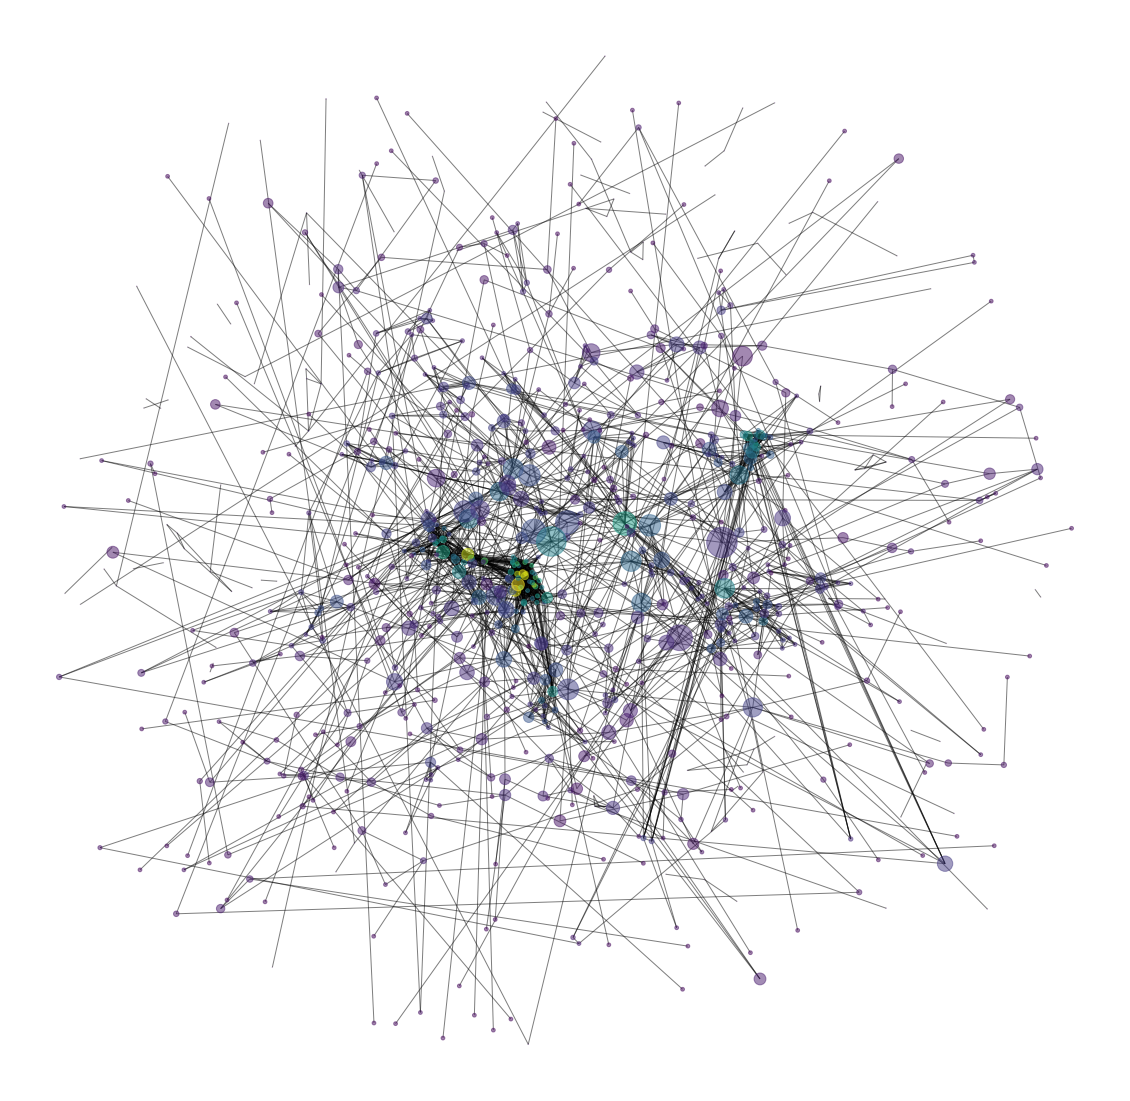

In [135]:
######### PLot the network for top 1000 keywords regarding degree
sub_list = list(degree_df['keyword'][:1000])
# sub_list = list(w_sum_df['keyword'][:1000])
G_sub = G_weighted.subgraph(sub_list)
print(nx.info(G_sub))

pos = nx.spring_layout(G_sub,k=0.15,iterations=20)
# pos = nx.spring_layout(G_sub)
betCent = nx.betweenness_centrality(G_sub, normalized=True, endpoints=True)
node_color = [20000.0 * G_sub.degree(v) for v in G_sub]
node_size =  [v * 10000 for v in betCent.values()]
font_size  = [v*10000  for v in betCent.values()]
font_size = [v+0.001 if v==0 else v for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.5)
plt.axis('off')
plt.show()

In [136]:
## Save or load the network to pickle
# nx.write_gpickle(G_weighted, "keyword_network_graph.gpickle")
# G_weighted = nx.read_gpickle("keyword_network_graph.gpickle")

In [ ]:
##### Compute the closeness centrality, super slow code
close_cent = nx.closeness_centrality(G_weighted, distance='weight')